Aquí, los días lunes, martes, ..., domingo se van a representar por medio de números; de hecho, se va a proponer que los lunes son todos múltiplos del número 7.

| L | M | W | J | V | S | D | L | M | W | J  | V  | S  | D  | L  |
|---|---|---|---|---|---|---|---|---|---|--- |--- |--- |--- |--- |
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 |




In [67]:
from random import random
import pandas as pd
import numpy as np
import openpyxl

# Variable aleatoria Bernoulli de parametro p.
def bernoulli(p):
	u = random()
	if u<=p:
		return 1
	else:
		return 0

# Variable aleatoria Binomial de parametros n y p.
def bin(n,p):
	if n==1:
		return bernoulli(p)
	else:
		return np.array([bernoulli(p) for i in range(n)]).sum()

# Variable aleatoria de la decision
def decision():
	u = random()
	if u<=0.6:
		return 1 # mandar a domicilio
	elif u>0.6 and u<=0.9:
		return 2 # compro las sillas en existencia
	elif u>0.9 and u<1:
		return 3 # compro sillas en existencia + sillas en CEDIS(Bodega)

def inventario(q,dias):
  q0 = q
  inv = []
  ventas = []
  encabezado = ['Inventario','Ventas']
  for i in range(dias):
    u1 = bin(6,3/6) # sillas que puede comprar para que se lleve a su domicilio
    u2 = bin(2,1/7) # compra de sillas que solo estan en la tienda
    u3 = bin(4,1/4) # compro las sillas que estaban en tienda mas otras sillas
    compra = decision()
    if i%7==0 or (i-3)%7==0:
      q = q0
      if compra==1:
        inv.append(q)
        ventas.append(u1)

      elif compra==2:
        if q-u2<0:
          ventas.append(q)
          q = 0
          inv.append(q)
        else:
          q-=u2
          inv.append(q)
          ventas.append(u2)

      elif compra==3:
        ventas.append(q+u3)
        q = 0
        inv.append(q)

    else:
      if q>0:
        if compra==1:
          inv.append(q)
          ventas.append(u1)

        elif compra==2:
          if q-u2<0:
            ventas.append(q)
            q = 0
            inv.append(q)
          else:
            q-=u2
            inv.append(q)
            ventas.append(u2)

        elif compra==3:
          ventas.append(q+u3)
          q = 0
          inv.append(q)
      else:
        inv.append(q)
        ventas.append(0)

  return pd.DataFrame(np.array([inv,ventas]).T,columns = encabezado)

**Simulación de ventas de sillas en una tienda Coppel durante 7 días junto con su gráfica.**

            0  1  2  3  4  5  6
Inventario  2  2  2  2  2  2  2
Ventas      4  0  3  3  4  0  0 




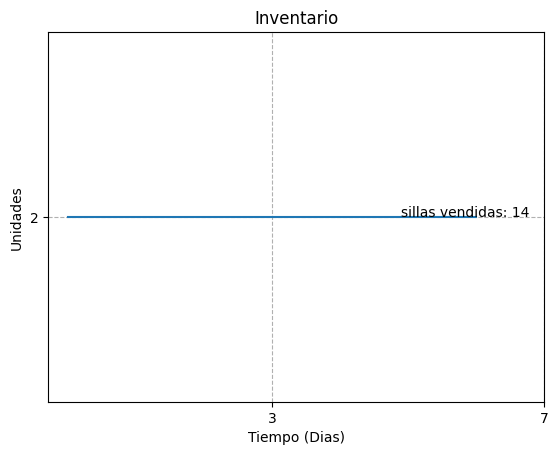

In [68]:
import matplotlib.pyplot as plt

# Primero se hace la simulacion, se imprime la tabla y luego se realiza la grafica
dias = 7
v = inventario(2,dias)
print(v.T,"\n\n")


# Grafica
fig , ax = plt.subplots()

plt.step(np.arange(0,dias,1),v['Inventario'],where='post')
ax.set_yticks(range(v['Inventario'].min(),v['Inventario'].max()+1))
plt.title('Inventario')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Unidades')
plt.text( dias*0.7 , 2 , 'sillas vendidas: {}'.format(v['Ventas'].sum()))
ax.grid(linestyle = 'dashed')

def indice(i):
  if i%7==0 or (i-3)%7==0:
    return i
ax.set_xticks(list(filter(indice,range(dias+2))))
# plt.savefig("grafico1.png")
plt.show()

In [69]:
tiendas = pd.read_csv("https://raw.githubusercontent.com/AyaxYordi/archivos-csv-o-excel/main/tiendas%20coppel.csv")
tiendas

,Coppel,Stock,Delegacion
0,Santa Martha,2,Iztapalapa
1,Fernando Arruti,2,Iztapalapa
2,Tepalcates,2,Iztapalapa
3,Plaza central,2,Iztapalapa
4,Purisima,2,Iztapalapa
5,Plaza Ermita,2,Iztapalapa
6,Atlalilco,2,Iztapalapa
7,Granjas Esmeralda,2,Iztapalapa
8,Del Moral,2,Iztapalapa
9,Tezontle,2,Iztacalco


In [70]:
# tiendas2 = pd.read_csv("tiendas coppel.csv")
# tiendas2

In [71]:
def sim(dias,tabla):
  A = np.zeros((len(tabla.index),dias))
  for j in range(len(tabla.index)):
    A[j] = inventario(2,dias)['Ventas']
  return pd.DataFrame(A , index = tabla.iloc[0:,0])

B = sim(7,tiendas)
B

,0,1,2,3,4,5,6
Coppel,,,,,,,
Santa Martha,1.0,1.0,0.0,0.0,3.0,0.0,4.0
Fernando Arruti,1.0,2.0,4.0,2.0,4.0,1.0,1.0
Tepalcates,4.0,4.0,5.0,6.0,3.0,0.0,0.0
Plaza central,4.0,0.0,3.0,2.0,5.0,0.0,0.0
Purisima,0.0,3.0,5.0,1.0,0.0,1.0,3.0
Plaza Ermita,1.0,2.0,3.0,4.0,3.0,0.0,4.0
Atlalilco,0.0,3.0,4.0,4.0,5.0,2.0,5.0
Granjas Esmeralda,3.0,0.0,0.0,3.0,1.0,1.0,5.0
Del Moral,1.0,4.0,1.0,3.0,2.0,0.0,0.0


In [72]:
B.sum()

0    28.0
1    23.0
2    34.0
3    35.0
4    46.0
5    21.0
6    34.0
dtype: float64

In [73]:
print("Total de sillas vendidas por todas las tiendas en una semana:",B.sum().sum())

Total de sillas vendidas por todas las tiendas en una semana: 221.0


**Simulacion para ventas de sillas en promedio durante una semana**

In [74]:
print("Promedio de sillas vendidas por semana entre todas las tiendas:",np.array([sim(7,tiendas).sum().sum() for i in range(2000)]).mean())

Promedio de sillas vendidas por semana entre todas las tiendas: 198.8375


In [75]:
print(sim(6000,tiendas).sum().mean())
print(sim(6000,tiendas).sum().std())

28.257666666666665
7.349658449879716


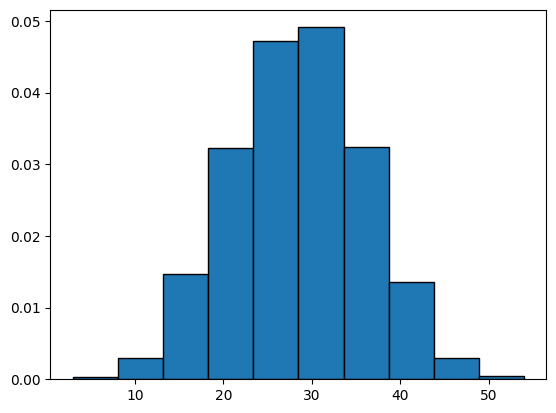

In [76]:
T = 5000
plt.hist(np.array(sim(T,tiendas).sum()), density=True,edgecolor='black')
# plt.savefig('inv1.png')
plt.show()

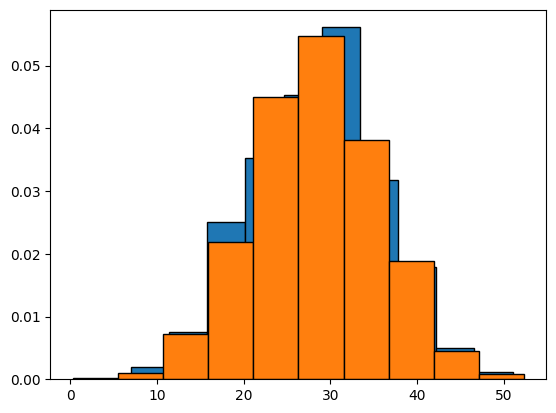

In [77]:
from random import normalvariate as N
from math import ceil

plt.hist(np.array(sim(T,tiendas).sum()), density=True,edgecolor='black')
plt.hist(np.array([N(28.28,7.23) for i in range(T)]), density=True,edgecolor='black')
# plt.savefig('inv2.png')
plt.show()

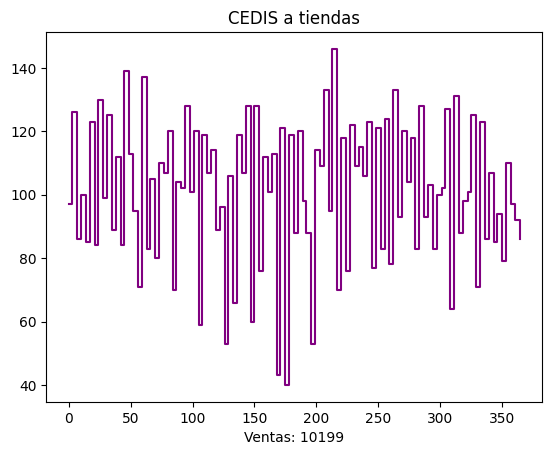

In [78]:
from random import normalvariate as N
from math import floor
import numpy as np
import matplotlib.pyplot as plt


def inv(dias):
	q0 = 198
	q = 0
	v = []
	s = []
	for k in range(dias):
		if k%7==0:
			u1 = floor(sum([N(28,7.4) for i in range(4)]))
			s.append(u1)
			q = q0 - u1
			v.append(q)
		elif (k-3)%7==0:
			u2 = floor(N(28,7.4)+N(28,7.4)+N(28,7.4))
			s.append(u2)
			q = q0 - u2
			v.append(q)
		else:
			v.append(q)
	return [v,s]

T = 365
w = inv(T)
plt.title('CEDIS a tiendas')
plt.step([i for i in range(T)],w[0],where='post',color='purple')
plt.xlabel('Ventas: {}'.format(np.array(w[1]).sum()))
# plt.savefig('inv3.png')
plt.show()